In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

# os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
# os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


True

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI , GoogleGenerativeAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

In [4]:
print(llm.invoke("Hey , who are you ??"))
print(embeddings.embed_query("Hey , who are you ??"))

content='Hey there!\n\nI am a large language model, trained by Google.' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--4abefa7c-50f6-48a1-9ed4-15dbad4c243c-0' usage_metadata={'input_tokens': 7, 'output_tokens': 270, 'total_tokens': 277, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 255}}
[0.012518692761659622, -0.03623774275183678, -0.03517773747444153, 0.027096299454569817, 0.00037546473322436213, 0.037958353757858276, 0.05115729942917824, 0.04442358389496803, 0.028012443333864212, 0.01885560154914856, -0.09148337692022324, -0.016658557578921318, 0.04837500676512718, -0.031365275382995605, -0.03341354429721832, -0.04911463335156441, -0.026846593245863914, 0.028125353157520294, -0.08439544588327408, -0.0829039141535759, 0.016194429248571396, -0.009853485971689224, -0.012983

In [5]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [6]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retriever=vectorstore.as_retriever()

In [7]:
retriever.invoke("what is langgraph")

### Retriever To Retriever Tools
# from langchain.tools.retriever import create_retriever_tool
from langchain_core.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000026EFBA29C60>, retriever=VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000026EE3547A10>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000026EFBA2B100>, retriever=VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000026EE3547A10>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, temp

In [8]:
langchain_urls=[
    "https://medium.com/munchy-bytes/exploring-langchain-ff13fff63340",
    "https://medium.com/@vikrampande783/introduction-to-langchain-9e09aae37e62",
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://medium.com/munchy-bytes/exploring-langchain-ff13fff63340', 'title': 'Exploring LangChain. In recent years, language models have… | by Fatima Mubarak | Tech Blog | Medium', 'description': 'Exploring LangChain In recent years, language models have become more advanced, allowing us to tackle complex tasks and extract information from large documents. However, these models have a limit on …', 'language': 'en'}, page_content='Exploring LangChain. In recent years, language models have… | by Fatima Mubarak | Tech Blog | MediumSitemapOpen in appSign upSign inMedium LogoWriteSearchSign upSign inTech Blog·Changing the way organizations look at dataExploring LangChainFatima Mubarak9 min read·Feb 12, 2024--ListenShareIn recent years, language models have become more advanced, allowing us to tackle complex tasks and extract information from large documents. However, these models have a limit on the amount of context they can consider, which can be tricky when

In [9]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [10]:
from langchain_core.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

tools=[retriever_tool,retriever_tool_langchain]

In [11]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [12]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [13]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_classic import hub
# from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [14]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    # question = messages[0].content

    question = None
    for msg in reversed(messages):
        if isinstance(msg,HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content
    
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [15]:
from langchain.messages import AIMessage

In [16]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    # question = messages[0].content

    question = None
    for msg in reversed(messages):
        if isinstance(msg,HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content

    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [AIMessage(content=response)]}

In [17]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    # question = messages[0].content

    question = None
    for msg in reversed(messages):
        if isinstance(msg,HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    response = model.invoke(msg)
    return {"messages": [HumanMessage(content=response.content)]}

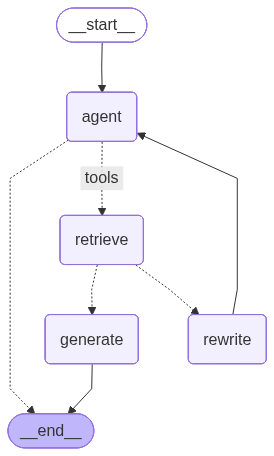

In [18]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
graph.invoke({"messages":"What is Langgraph?"})

In [19]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='f7c0fb38-f3cd-4a7b-8b68-304bde5e3261'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'retriever_vector_langchain_blog', 'arguments': '{"query": "What is Langchain?"}'}, '__gemini_function_call_thought_signatures__': {'61d5c1c7-e879-4eba-92ff-abd062e302df': 'Cr4CAdHtim+iUKmiJOpbB4QFooj7QRnrM8dQNJBQQHqdo5sq++5IglXUWsBUh8wfko9XPTUyDkLVvKlfgOI9/JNhUxAcq6lS68axiCGHFwAfpAsg3bXG9mDZJHe8QxlZFXg6a5vdcrQPc8Ci3BzrXNNSVH7tzQNaN0cWLlbVuESNVrYf4xD37c7WxBsJzZoaNBcq36CbadeRSH3lJIQbQplVpAGYD9jPNUzwgHImEuPyB+hi+88m275+mqg1oUF7uU3WIQ6kG8cuAu4Y0FVL8c0t42iLp1Ckm3ff1X9POFC0y+qe3DQBbimEY6ahHs/SvRQ1eSqgkr9iL3AUD4f8/UFQD19igFEy9WP3VK5ZKa7q+QfxmRfzGQQ/KGfsYjbnl97d3ELTSQkipzgkmDI42DO8yw9o+4qpjBTll9FtDZ7y'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 

In [20]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='1b524fba-4f87-47ac-81ae-e7844a33237b'),
  AIMessage(content='I can only answer questions related to Langchain and Langgraph. I cannot answer general questions about Machine Learning. ', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--ecbb2516-d9ae-4270-866c-8d9c1a1608e6-0', usage_metadata={'input_tokens': 103, 'output_tokens': 22, 'total_tokens': 125, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
graph.invoke({"messages":"Tell me about Langgraph ecosystem"})